In [1]:
import tensorflow as tf   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()


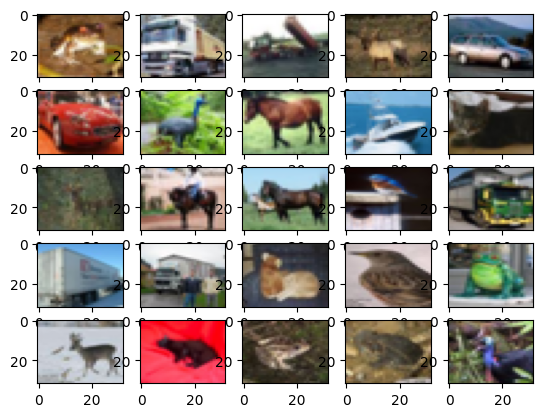

In [5]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [6]:
K = len(set(y_train))

print("number of classes:", K)

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.summary()


number of classes: 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=18)

Epoch 1/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.4525 - loss: 1.7555 - val_accuracy: 0.6458 - val_loss: 1.0403
Epoch 2/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6976 - loss: 0.8666 - val_accuracy: 0.7154 - val_loss: 0.8437
Epoch 3/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7647 - loss: 0.6866 - val_accuracy: 0.7576 - val_loss: 0.7259
Epoch 4/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8086 - loss: 0.5560 - val_accuracy: 0.7589 - val_loss: 0.6987
Epoch 5/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.8342 - loss: 0.4786 - val_accuracy: 0.7890 - val_loss: 0.6818
Epoch 6/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.8642 - loss: 0.3885 - val_accuracy: 0.7896 - val_loss: 0.6671
Epoch 7/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8845 - loss: 0.3303 - val_accuracy: 0.8050 - val_loss: 0.6280
Epoch 8/18
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9043 -

In [9]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:12 85ms/step - accuracy: 0.7188 - loss: 1.7929

C:\Users\ayub-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8061 - loss: 0.6321 - val_accuracy: 0.8160 - val_loss: 0.5607
Epoch 2/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8125 - loss: 0.5073

C:\Users\ayub-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8125 - loss: 0.5073 - val_accuracy: 0.8171 - val_loss: 0.5582
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8407 - loss: 0.4879 - val_accuracy: 0.8352 - val_loss: 0.4879
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.5363 - val_accuracy: 0.8340 - val_loss: 0.4913
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8480 - loss: 0.4500 - val_accuracy: 0.8194 - val_loss: 0.5612
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7812 - loss: 0.5821 - val_accuracy: 0.8173 - val_loss: 0.5657
Epoch 7/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8599 - loss: 0.4149 - val_accuracy: 0.8329 - val_loss: 0.5064
Epoch 8/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.3394 - val_accuracy: 0.8326 - val_loss: 0.5070
Epoch 9/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.8638 - loss: 0.4003 - val

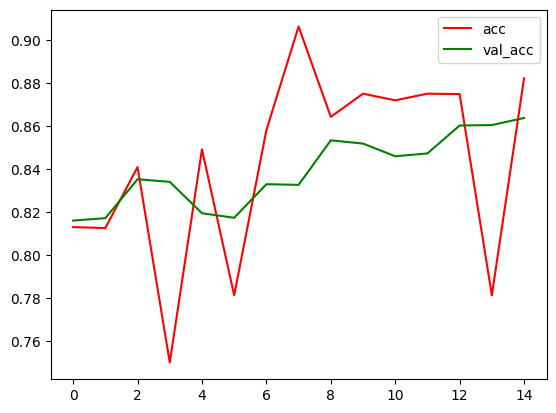

In [10]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
cat cat


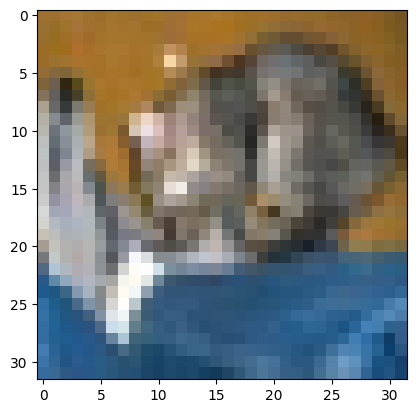

In [11]:
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
image_number = 0

plt.imshow(x_test[image_number])

n = np.array(x_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(p).argmax()]

original_label = labels[y_test[image_number]]

print(original_label, predicted_label)


In [12]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
print(classification_report(y_test, y_pred_classes, target_names=labels))


NameError: name 'classification_report' is not defined

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

print(classification_report(y_test, y_pred_classes, target_names=labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87      1000
  automobile       0.90      0.95      0.92      1000
        bird       0.78      0.82      0.80      1000
         cat       0.82      0.66      0.73      1000
        deer       0.88      0.84      0.86      1000
         dog       0.83      0.80      0.81      1000
        frog       0.83      0.93      0.88      1000
       horse       0.91      0.91      0.91      1000
        ship       0.93      0.92      0.92      1000
       truck       0.89      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



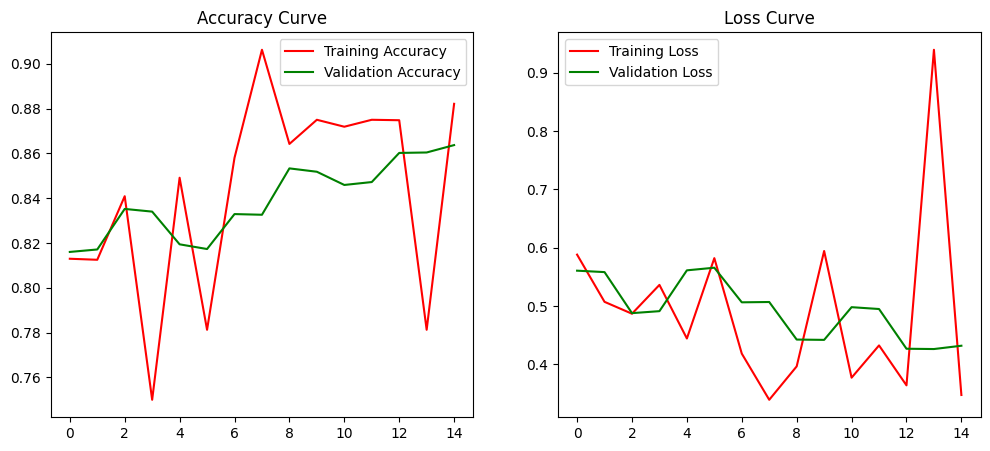

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Training Loss', color='red')
plt.plot(r.history['val_loss'], label='Validation Loss', color='green')
plt.legend()
plt.title("Loss Curve")

plt.show()


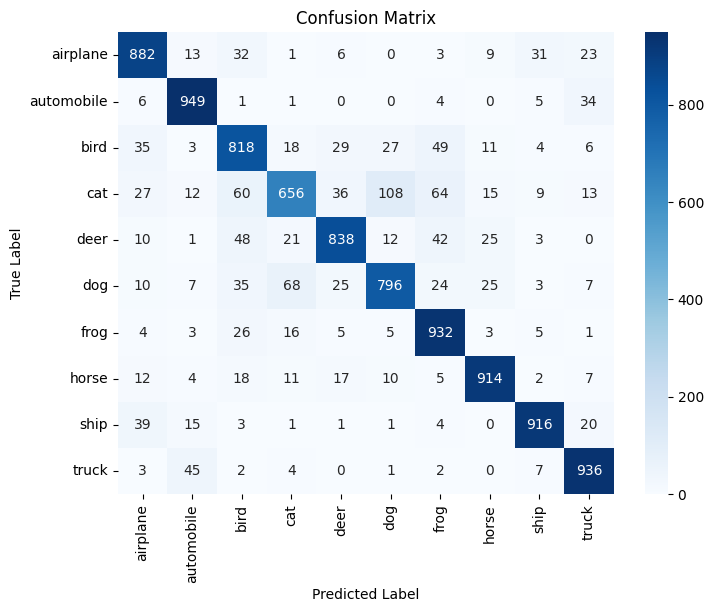

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [18]:
model.save('cifar10.keras')

In [19]:
model.save('cifar10_2.keras')

In [20]:
lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,          
    verbose=1
)

model = tf.keras.models.load_model('cifar10.keras')

model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    initial_epoch=0,
    callbacks=[lr_on_plateau]
)


C:\Users\ayub-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 30 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.9484 - loss: 0.1484 - val_accuracy: 0.8702 - val_loss: 0.4748 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9732 - loss: 0.0783 - val_accuracy: 0.8666 - val_loss: 0.5749 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9781 - loss: 0.0628 - val_accuracy: 0.8684 - val_loss: 0.6560 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9814 - loss: 0.0559 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.9814 - loss: 0.0559 - val_accuracy: 0.8678 - val_loss: 0.6770 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9867 - loss: 0.0401 - val_accuracy: 0.8784 - val_loss: 0.6828 - learning_rate: 5.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - acc

C:\Users\ayub-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 30 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87      1000
  automobile       0.90      0.95      0.92      1000
        bird       0.78      0.82      0.80      1000
         cat       0.82      0.66      0.73      1000
        deer       0.88      0.84      0.86      1000
         dog       0.83      0.80      0.81      1000
        frog       0.83      0.93      0.88      1000
       horse       0.91      0.91      0.91      1000
        ship       0.93      0.92      0.92      1000
       truck       0.89      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



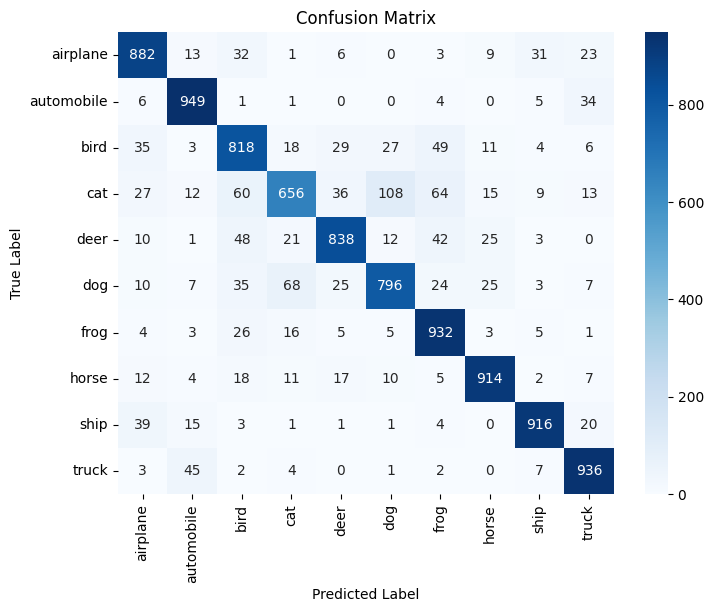

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

model = tf.keras.models.load_model('cifar10.keras')

y_pred_prob = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

print(classification_report(y_test, y_pred_classes, target_names=labels))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [24]:
model.save("cifar10_3.keras")

In [25]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model('cifar10_3.keras')

In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,793,558 (18.29 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2,396,332 (9.14 MB)

In [27]:
for layer in model.layers:
    layer.trainable = False

unfrozen_layer_names = ["conv2d_4", "batch_normalization_4","conv2d_5", "batch_normalization_5","max_pooling2d_2","flatten", "dropout", "dense", "dropout_1", "dense_1"]

for layer in model.layers:
    if layer.name in unfrozen_layer_names:
        layer.trainable = True

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

train_generator = data_generator.flow(x_train, y_train, batch_size=32)


In [30]:
class_weight = {
    0: 1.0,
    1: 1.0,
    2: 1.0,
    3: 2.0,
    4: 1.0,
    5: 2.0,
    6: 1.0,
    7: 1.0,
    8: 1.0,
    9: 1.0
}

In [31]:
history = model.fit(train_generator,epochs=10,validation_data=(x_test, y_test),class_weight=class_weight)


Epoch 1/10


C:\Users\ayub-\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8749 - loss: 0.4554 - val_accuracy: 0.8722 - val_loss: 0.4006
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8852 - loss: 0.4192 - val_accuracy: 0.8727 - val_loss: 0.3981
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8888 - loss: 0.4107 - val_accuracy: 0.8732 - val_loss: 0.3916
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8950 - loss: 0.3840 - val_accuracy: 0.8756 - val_loss: 0.3853
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8964 - loss: 0.3811 - val_accuracy: 0.8765 - val_loss: 0.3816
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8973 - loss: 0.3801 - val_accuracy: 0.8771 - val_loss: 0.3798
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8975 - loss: 0.3714 - val_accuracy: 0.8760 - val_loss: 0.3861
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.9004 - loss: 0.36

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1000
           1       0.92      0.96      0.94      1000
           2       0.86      0.82      0.84      1000
           3       0.76      0.74      0.75      1000
           4       0.88      0.86      0.87      1000
           5       0.85      0.79      0.82      1000
           6       0.83      0.95      0.89      1000
           7       0.94      0.92      0.93      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



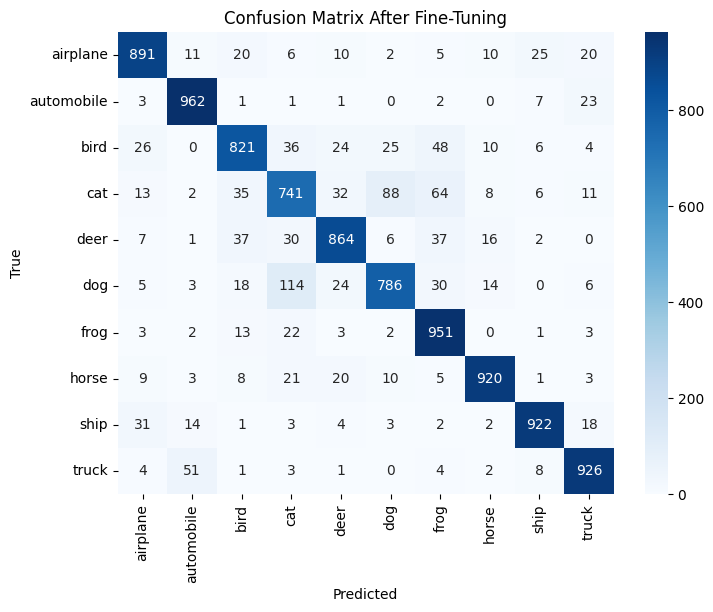

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
print(classification_report(y_test, y_pred_classes))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix After Fine-Tuning")
plt.show()


In [54]:
model = tf.keras.models.load_model('cifar10_4.keras')

In [55]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,057,984 (26.92 MB)

 Trainable params: 2,330,378 (8.89 MB)

 Non-trainable params: 66,848 (261.12 KB)

 Optimizer params: 4,660,758 (17.78 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
cat cat


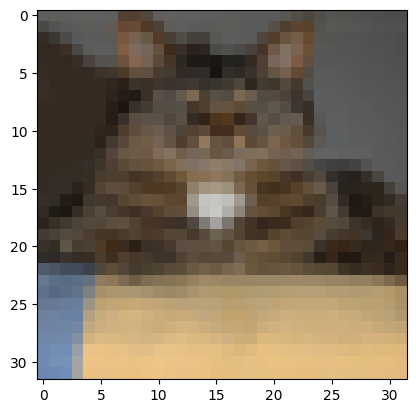

In [59]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
image_number = 695

plt.imshow(x_test[image_number])

n = np.array(x_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(p).argmax()]

original_label = labels[y_test[image_number]]

print(original_label, predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
horse horse


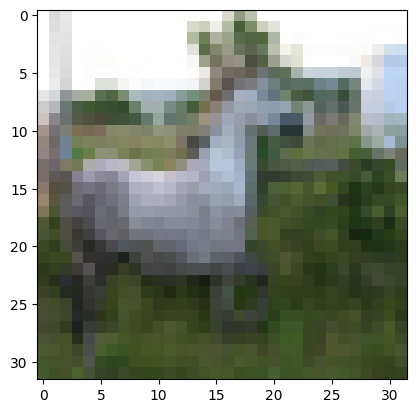

In [60]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
image_number = 69

plt.imshow(x_test[image_number])

n = np.array(x_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(p).argmax()]

original_label = labels[y_test[image_number]]

print(original_label, predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
dog dog


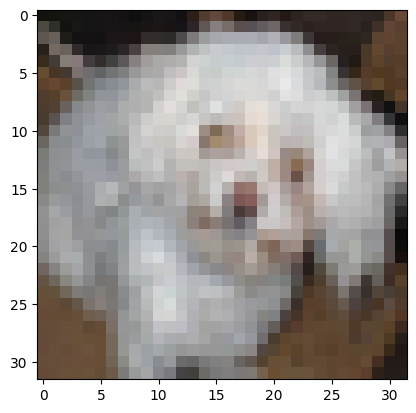

In [61]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
image_number = 1000

plt.imshow(x_test[image_number])

n = np.array(x_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(p).argmax()]

original_label = labels[y_test[image_number]]

print(original_label, predicted_label)
